In [ ]:
import matplotlib.pyplot as plt
import os
import utils
from transformers import T5Tokenizer
from unidecode import unidecode

tokenizer = T5Tokenizer.from_pretrained(t5_model, model_max_length=1024)

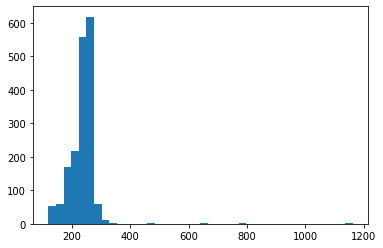

In [8]:
task_name = 'ropes'
t5_model = 't5-base'

examples = []
prefix = utils.get_task_prefixes('data', task_name)[0]
for suffix in ['_train.tsv', '_dev.tsv', '_test.tsv']:
    with open(os.path.join('data', task_name, prefix + suffix), encoding="utf-8") as fin:
        lines = fin.readlines()
    for line in lines:
        d = unidecode(line).strip().split("\t")
        examples.append([d[0], d[1:]])

lengths = [len(tokenizer(ex[0])['input_ids']) for ex in examples]
n, bins, patches = plt.hist(lengths, 40)
plt.show()